In [57]:
# Shap analysis indicated that "AL" is a defining dipeptide for psychrophilicity.
#Quite clear shift for C.gunnari and P. Tessalata
dogfishSeq="""MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCDELAMVDVMEDKLKGEVMDLQHGSLFLKTKIVGDKDYSVTANSKVVVVTAGARQQEGESRLNLVQRNVNIFKFIIPNIVKYSPNCILMVVSNPVDILTYVAWKLSGFPRHRVIGSGTNLDSARFRHLIGEKLHLHPSSCHAWIVGEHGDSSVPVWSGVNVAGVSLQGLNPQMGTEGDGENWKAIHKEVVDGAYEVIKLKGYTSWAIGMSVADLVESIIKNMHKVHPVSTLVQGMHGVKDEVFLSVPCVLGNSGLTDVIHMTLKAEEEKQLQKSAETLWGVQKELTL"""
dogfishSeq="MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCDELAMVDVMEDKLKGEVMDLQHGSLFLKTKIVGDKDYSVTANSKVVVVTAGARQQEGESRLNLVQRNVNIFKFIIPNIVKYSPNCILMVVSNPVDILTYVAWKLSGFPRHRVIGSGTNLDSARFRHLIGEKLHLHPSSCHAWIVGEHGDSSVPVWSGVNVAGVSLQGLNPQMGTEGDGENWKAIHKEVVDGAYEVIKLKGYTSWAIGMSVADLVESIIKNMHKVHPVSTLVQGMHGVKDEVFLSVPCVLGNSGLTDVIHMTLKAEEEKQVQKSAETLWGVQKELTL"
dogfishSeqList=list(dogfishSeq)

In [58]:
from tensorflow import keras
import numpy as np
model = keras.models.load_model("psychornot-keras")
aa="AGSTNQVILMFYWHPKREDC"
def seqpair_tokenize(seq):
    #Takes a single-character protein sequence, returns a 20x20 ndarray with the frequencies of sequence neighbors 
    prev=""
    cur=""
    second=""
    aapairs=np.zeros((20,20))
    wl=1/len(seq)
    for c in seq:
        try:
            cur=aa.index(c)
        except ValueError:
            prev=""
        if prev:
            aapairs[prev,cur]+=wl
    
        prev=cur
    return aapairs
def predict_sequence_score(model,seq):
    tokenized=(np.expand_dims(seqpair_tokenize(seq),0))
    prediction= model.predict(tokenized)
    return prediction

In [59]:
predict_sequence_score(model,dogfishSeq)

array([[ 0.34503984, -0.022397  ]], dtype=float32)

In [60]:
import re
for Lpos in [m.start() for m in re.finditer("L",dogfishSeq)]:
    previousPos=dogfishSeq[Lpos-1]
    if previousPos not in "DEKR":
        dogfishSeqList[Lpos-1]="A"

In [61]:
mutated="".join(dogfishSeqList)

In [62]:
dogfishSeq

'MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCDELAMVDVMEDKLKGEVMDLQHGSLFLKTKIVGDKDYSVTANSKVVVVTAGARQQEGESRLNLVQRNVNIFKFIIPNIVKYSPNCILMVVSNPVDILTYVAWKLSGFPRHRVIGSGTNLDSARFRHLIGEKLHLHPSSCHAWIVGEHGDSSVPVWSGVNVAGVSLQGLNPQMGTEGDGENWKAIHKEVVDGAYEVIKLKGYTSWAIGMSVADLVESIIKNMHKVHPVSTLVQGMHGVKDEVFLSVPCVLGNSGLTDVIHMTLKAEEEKQVQKSAETLWGVQKELTL'

In [63]:
predict_sequence_score(model,mutated)

array([[0.17412798, 0.11383058]], dtype=float32)

In [64]:
mutated.count("AL")

18

In [65]:
dogfishSeq.count("AL")

0

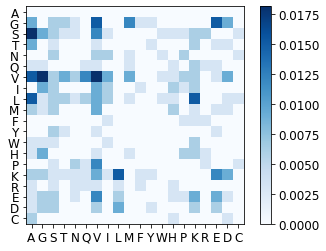

In [66]:
import matplotlib.pyplot as pl

fig, ax = pl.subplots(1,1)
pl.rc('ytick', labelsize=12) 
pl.rc('xtick', labelsize=12) 

img = ax.imshow(seqpair_tokenize(mutated),cmap="Blues")
ax.set_xticks(range(0,20))
ax.set_yticks(range(0,20))

#io.imshow(difference)
ax.set_xticklabels(aa)
ax.set_yticklabels(aa)
fig.colorbar(img)

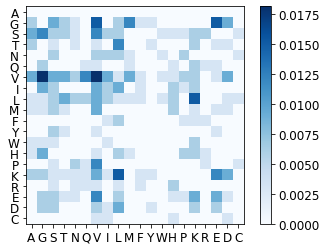

In [67]:

fig, ax = pl.subplots(1,1)
pl.rc('ytick', labelsize=12) 
pl.rc('xtick', labelsize=12) 

img = ax.imshow(seqpair_tokenize(dogfishSeq),cmap="Blues")
ax.set_xticks(range(0,20))
ax.set_yticks(range(0,20))

#io.imshow(difference)
ax.set_xticklabels(aa)
ax.set_yticklabels(aa)
fig.colorbar(img)